# Exercício - Aula 3 (07/10/2022)
### Nome: Adriel Bombonato Guidini Godinho
### RA: 191011631

---

### 1) Implemente sua própria função de cálculo de histograma apresentando o código em Python;

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# No opencv

def calc_histogram_opencv(image):
    hist_opencv = cv2.calcHist([image],[0],None,[256],[0,256])
    return hist_opencv

# No numpy

def calc_histogram_numpy(image):
    hist_numpy,bins = np.histogram(image.ravel(),256,[0,256])
    return hist_numpy

# Pelo próprio Matplolib

def calc_plt(image):
    plt.hist(image.ravel(),256,[0,256])

def plot_hist(histogram):
    plt.figure()
    plt.title("Histograma escala cinza")
    plt.xlabel("Bins")
    plt.ylabel("# de Pixels")
    plt.plot(histogram)
    plt.xlim([0, 256])

### 2) Aplique a equalização em diferentes imagens e no exemplo apresentado no livro do Gonzalez para demonstrar o funcionamento da função;

Faça os gráficos dos histogramas de entradas e saída, bem como a função T(r)

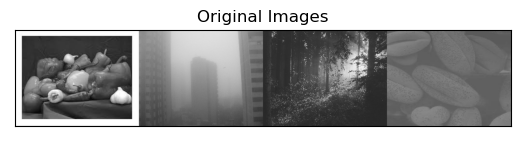

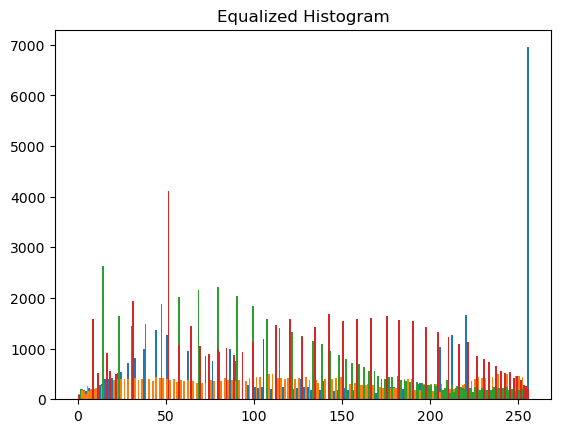

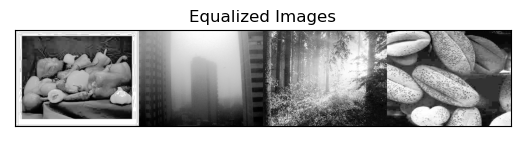

In [15]:
# Aplicando em 4 imagens diferentes 

img1 = cv2.imread('images\\pimenta.jpg',0)
img2 = cv2.imread('images\\fog.jpg',0)
img3 = cv2.imread('images\\forest.jpg',0)
img_gonzales = cv2.imread('images\\polen_gonzales.png',0)

# igualando dimensões
img2 = cv2.resize(img2, (img1.shape[1],img1.shape[0]))
img3 = cv2.resize(img3, (img1.shape[1],img1.shape[0]))
img_gonzales = cv2.resize(img_gonzales, (img1.shape[1],img1.shape[0]))

# Equalizando os Histogramas
img1_equalized = cv2.equalizeHist(img1)
img2_equalized = cv2.equalizeHist(img2)
img3_equalized = cv2.equalizeHist(img3)
img_gonzales_equalized = cv2.equalizeHist(img_gonzales)

res = np.hstack((img1,img2,img3,img_gonzales)) #Coloca imagem uma do lado da outra
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB) # Converter a imagem de BGR para RGB
plt.title('Original Images')
plt.imshow(res)
plt.xticks([]), plt.yticks([])  # Esconder eixo x e y
plt.show()

titles = ['Pimentas', 'Prédios com névoa', 'Floresta', 'Pólen']
images = [img1, img2, img3, img_gonzales]

calc_plt(img1_equalized)
calc_plt(img2_equalized)
calc_plt(img3_equalized)
calc_plt(img_gonzales_equalized)
plt.title('Equalized Histogram')
plt.show()

res_equalized = np.hstack((img1_equalized,img2_equalized,img3_equalized,img_gonzales_equalized)) #Coloca imagem uma do lado da outra
res_equalized = cv2.cvtColor(res_equalized, cv2.COLOR_BGR2RGB) # Converter a imagem de BGR para RGB
plt.title('Equalized Images')
plt.imshow(res_equalized)
plt.xticks([]), plt.yticks([])  # Esconder eixo x e y
plt.show()


### 3) Implemente a sua função de segmentação por limiar, calculando o limiar ótimo conforme apresentado no livro do Gonzalez.
O cáculo automático do limiar ótimo pode ser feito pelo método de Otsu.

In [17]:
# Otsu's thresholding
def threshold_por_limiar(image):
    ret,thresh = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return thresh

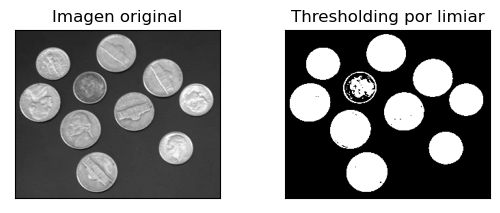

In [23]:
img = cv2.imread('D:\Github\Geral\VisComp22\Aula3\images\coins.jpg', 0)

thresh = threshold_por_limiar(img)


titles = ['Imagem original', 'Thresholding por limiar']
images = [img, thresh]
for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 4) Faça uma versão que considere a aplicação da segmentação adaptativa 
Para segmentação adaptativa, não estaremos mais tratando de apenas um limiar T, mas de limiares locais que levam em consideração os valores de vizinhos.

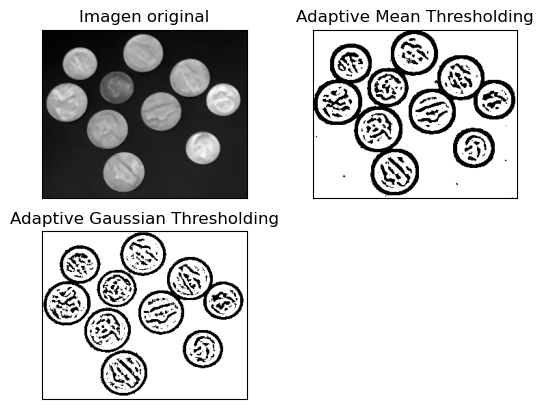

In [22]:
img = cv2.imread('D:\Github\Geral\VisComp22\Aula3\images\coins.jpg', 0)

# Deixar a imagem mais borrada, para impedir que haja valores concentrados muito altos. Isso ajuda a ter um threshold mais 'limpo'
img = cv2.medianBlur(img,5)


# Fórmula com média aritmética
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

# Fórmula com média Gaussiana
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)


titles = ['Imagen original', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th2, th3]
for i in range(3):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()